In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm, trange

from utils import load_mnist, minibatches
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist()

In [3]:
import torch
from torch import nn
from torch.autograd import Variable

class View(nn.Module):
    def __init__(self, *shape):
        super().__init__()
        self.shape = shape
        
    def forward(self, input):
        return input.view(*self.shape)

In [4]:
net = torch.nn.Sequential(
    nn.Conv2d(1, 8, 3),
    nn.MaxPool2d(2),
    nn.ReLU(),
    nn.Conv2d(8, 16, 3),
    nn.MaxPool2d(2),
    nn.ReLU(),
    View(-1, 5 ** 2 * 16),
    nn.Linear(5 ** 2 * 16, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
    nn.LogSoftmax(),
).cuda()

criterion = torch.nn.NLLLoss()

In [5]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
losses = []

In [6]:
epochs = 10
batch_size = 1000
freq = 2000 / batch_size

In [9]:
for epoch in range(epochs):
    ep = 'Epoch %d: ' % epoch
    mean_loss = 0
    step = 0
    bar = tqdm(minibatches(X_train, y_train, batch_size=batch_size), leave=False, 
               total=(epochs-epoch) * len(X_train) // batch_size)
    for x, y in bar:
        x = Variable(torch.from_numpy(x)).cuda()
        y = Variable(torch.from_numpy(y.astype('long'))).cuda()

        y_pred = net(x)
        loss = criterion(y_pred, y)
        mean_loss += loss.cpu().data[0]

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        step += 1
        if step >= freq:
            losses.append(mean_loss / step)
            bar.set_description(ep + str(losses[-1]))
            mean_loss = step = 0
    if step:
        losses.append(mean_loss / step)
        bar.set_description(ep + str(losses[-1]))

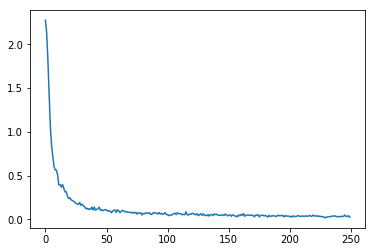

In [10]:
plt.plot(losses)

In [ ]:
y = y_pred.cpu().data.numpy()
x = x.cpu().data.numpy()

7

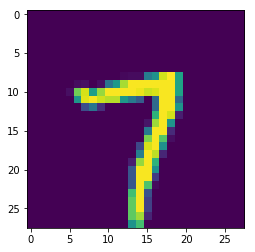

In [16]:
i = 200
plt.imshow(x[i,0])
np.argmax(y[i])